## Exploratory Data Analysis (EDA)

## Introduction

In this lecture, we will explore the importance of Exploratory Data Analysis (EDA) in football analysis and provide an overview of the key concepts and techniques covered.

EDA is a crucial step in the data analysis process, allowing us to gain insights, understand patterns, and make informed decisions based on the available data. EDA helps us uncover valuable information about player performance, team strategies, and game dynamics.

Throughout this lecture, we will cover the following key concepts and techniques:
 - Descriptive Statistics
 - Distributions & Dispersion Metrics
 - Relational Analysis
 - Correlation & Covariance
 - Data Distribution and Patterns


In [1]:
pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.9 MB/s eta 0:00:00


In [3]:
pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 5.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch
from math import pi
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)
pd.options.mode.copy_on_write = True
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load competition data
competitions = sb.competitions()
print("Available competitions:")

display(competitions.head())

Available competitions:


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882


In [6]:
# Get information about a specific competition
competition_id = 43  # 43 represents the FIFA World Cup 2018
competition_info = competitions.loc[competition_id]
print(f"\nInformation about competition {competition_info['competition_name']}:")
print(f"Country: {competition_info['country_name']}")
print(f"Gender: {competition_info['competition_gender']}")
print(f"Season: {competition_info['season_name']}")


Information about competition La Liga:
Country: Spain
Gender: male
Season: 2015/2016


In [7]:
# Load match data for the selected competition and season
season_id = 3  # 3 represents the 2018 season
matches = sb.matches(competition_id, season_id)
print(f"\nNumber of matches in the {competitions.loc[competition_id, 'competition_name']} {season_id}: {len(matches)}")



Number of matches in the La Liga 3: 64


In [8]:
# Get information about a specific match
match_id = matches.loc[0, 'match_id']  # Select the first match
match_info = matches.loc[matches['match_id'] == match_id].iloc[0]
print(f"\nInformation about match {match_id}:")
print(f"Home team: {match_info['home_team']}")
print(f"Away team: {match_info['away_team']}")
print(f"Match date: {match_info['match_date']}")
print(f"Stadium: {match_info['stadium']}")


Information about match 7585:
Home team: Colombia
Away team: England
Match date: 2018-07-03
Stadium: Otkritie Bank Arena


In [9]:
# Load event data for the selected match
events = sb.events(match_id)
print(f"\nNumber of events in match {match_id}: {len(events)}")


Number of events in match 7585: 4019


In [10]:
# Assuming `events` contains the loaded event data from a specific match
# Filter to include only certain types of events or actions for detailed analysis
shots = events[events['type'] == 'Shot']
passes = events[events['type'] == 'Pass']



In [11]:
# Descriptive statistics for shots
print("Shots Descriptive Statistics:")
display(shots.describe())

# Descriptive statistics for passes
print("\nPasses Descriptive Statistics:")
display(passes.describe())


Shots Descriptive Statistics:


,duration,index,match_id,minute,pass_angle,pass_length,pass_recipient_id,period,player_id,possession,possession_team_id,second,shot_statsbomb_xg,substitution_outcome_id,substitution_replacement_id,team_id
count,41.000000,41.000000,41.0,41.000000,0.0,0.0,0.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,0.0,0.0,41.000000
mean,0.833415,2639.317073,7585.0,79.512195,NaN,NaN,NaN,2.756098,5454.756098,137.365854,768.463415,29.243902,0.266108,NaN,NaN,768.463415
std,0.432136,1265.174720,0.0,39.837873,NaN,NaN,NaN,1.593432,2766.475897,69.455294,0.504854,19.027323,0.331172,NaN,NaN,0.504854
min,0.200000,240.000000,7585.0,5.000000,NaN,NaN,NaN,1.000000,3094.000000,11.000000,768.000000,0.000000,0.006180,NaN,NaN,768.000000
25%,0.427000,1592.000000,7585.0,46.000000,NaN,NaN,NaN,1.000000,3336.000000,75.000000,768.000000,14.000000,0.030466,NaN,NaN,768.000000
50%,0.840000,2816.000000,7585.0,86.000000,NaN,NaN,NaN,2.000000,3612.000000,140.000000,768.000000,28.000000,0.079690,NaN,NaN,768.000000
75%,1.293000,3912.000000,7585.0,118.000000,NaN,NaN,NaN,4.000000,6193.000000,209.000000,769.000000,47.000000,0.783500,NaN,NaN,769.000000
max,1.613000,4016.000000,7585.0,127.000000,NaN,NaN,NaN,5.000000,10960.000000,224.000000,769.000000,59.000000,0.783500,NaN,NaN,769.000000



Passes Descriptive Statistics:


,duration,index,match_id,minute,pass_angle,pass_length,pass_recipient_id,period,player_id,possession,possession_team_id,second,shot_statsbomb_xg,substitution_outcome_id,substitution_replacement_id,team_id
count,1161.000000,1161.000000,1161.0,1161.000000,1161.000000,1161.000000,1066.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,0.0,0.0,0.0,1161.000000
mean,1.620669,1984.502153,7585.0,58.191214,-0.071001,22.356901,4898.799250,1.965547,4744.968992,100.566753,768.497847,29.144703,NaN,NaN,NaN,768.478898
std,0.900032,1146.103682,0.0,35.805431,1.517292,15.194038,2194.766232,1.026637,1958.831973,59.699543,0.500211,17.230078,NaN,NaN,NaN,0.499770
min,0.053000,5.000000,7585.0,0.000000,-3.091634,0.000000,3094.000000,1.000000,3094.000000,2.000000,768.000000,0.000000,NaN,NaN,NaN,768.000000
25%,1.053000,1008.000000,7585.0,27.000000,-1.234122,12.206555,3293.000000,1.000000,3308.000000,48.000000,768.000000,14.000000,NaN,NaN,NaN,768.000000
50%,1.426000,1951.000000,7585.0,51.000000,-0.039979,18.439089,3532.000000,2.000000,3532.000000,90.000000,768.000000,29.000000,NaN,NaN,NaN,768.000000
75%,1.920000,2986.000000,7585.0,93.000000,1.035841,28.231188,5691.000000,3.000000,5691.000000,157.000000,769.000000,44.000000,NaN,NaN,NaN,769.000000
max,6.813000,3993.000000,7585.0,121.000000,3.141593,94.201910,10960.000000,4.000000,10960.000000,212.000000,769.000000,59.000000,NaN,NaN,NaN,769.000000


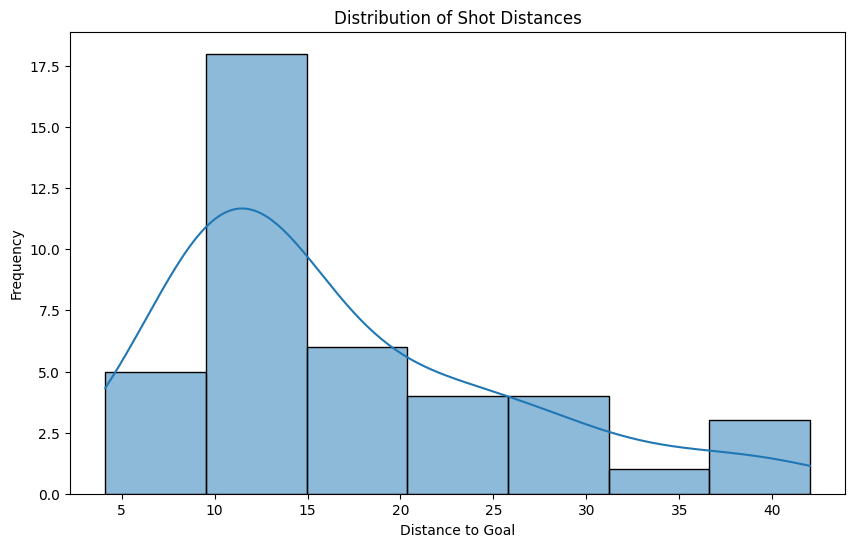

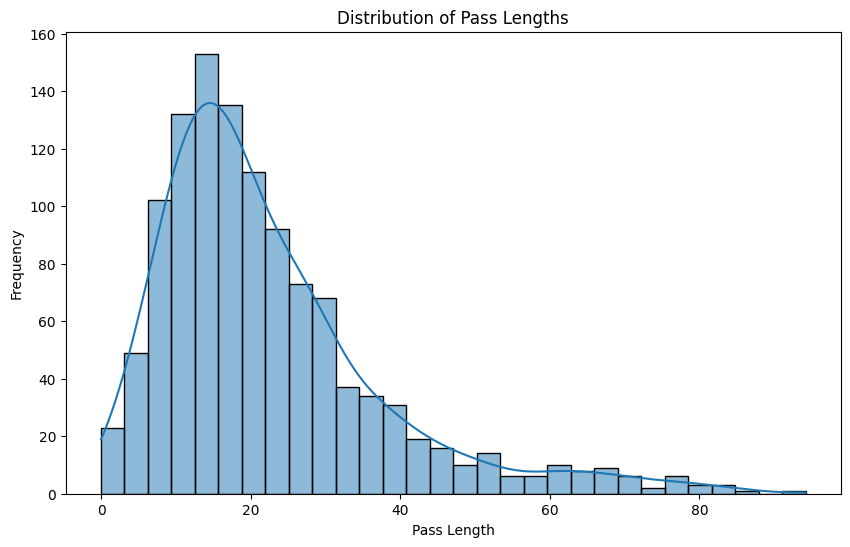

In [12]:
# Shot distances
shots['distance'] = shots.apply(lambda x: np.linalg.norm([x['location'][0]-120, x['location'][1]-40]), axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(shots['distance'], kde=True)
plt.title('Distribution of Shot Distances')
plt.xlabel('Distance to Goal')
plt.ylabel('Frequency')
plt.show()

# Pass lengths
passes['length'] = passes['pass_length']
plt.figure(figsize=(10, 6))
sns.histplot(passes['length'], kde=True, bins=30)
plt.title('Distribution of Pass Lengths')
plt.xlabel('Pass Length')
plt.ylabel('Frequency')
plt.show()


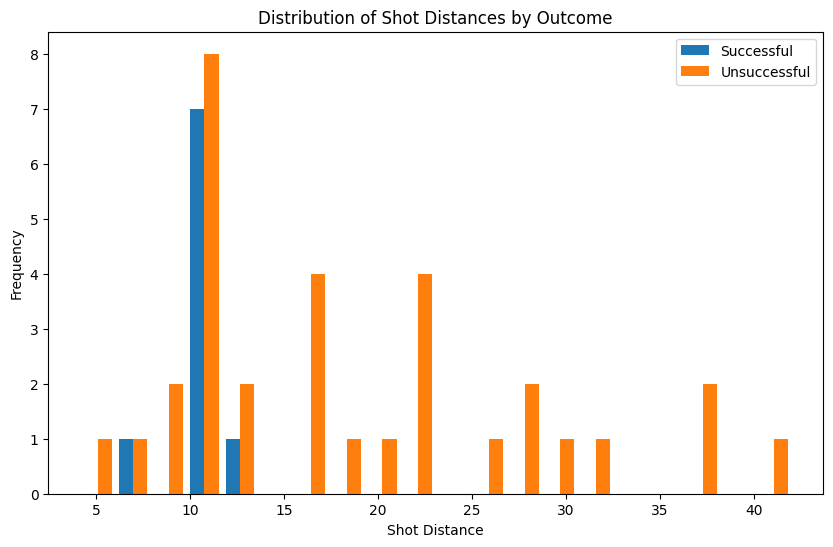

In [13]:

# Compare the distributions of shot distances between successful and unsuccessful shots
successful_shots = shots[shots['shot_outcome'] == 'Goal']
unsuccessful_shots = shots[shots['shot_outcome'] != 'Goal']

plt.figure(figsize=(10, 6))
plt.hist([successful_shots['distance'], unsuccessful_shots['distance']], bins=20, label=['Successful', 'Unsuccessful'])
plt.xlabel('Shot Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Shot Distances by Outcome')
plt.legend()
plt.show()


Analyzing shot outcomes


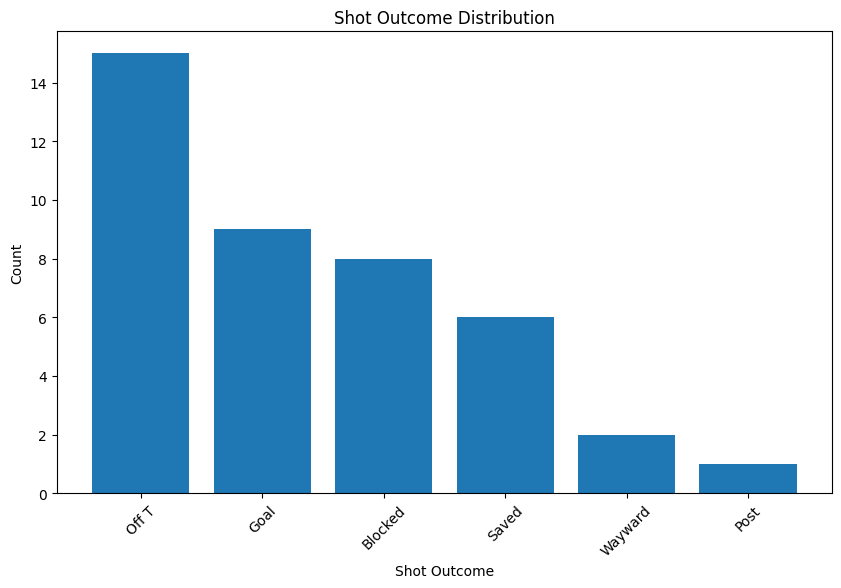

In [14]:
# Analyzing shot outcomes
print("\nAnalyzing shot outcomes")
shot_outcome_counts = shots['shot_outcome'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(shot_outcome_counts.index, shot_outcome_counts.values)
plt.xlabel('Shot Outcome')
plt.ylabel('Count')
plt.title('Shot Outcome Distribution')
plt.xticks(rotation=45)
plt.show()


Analyzing pass outcomes


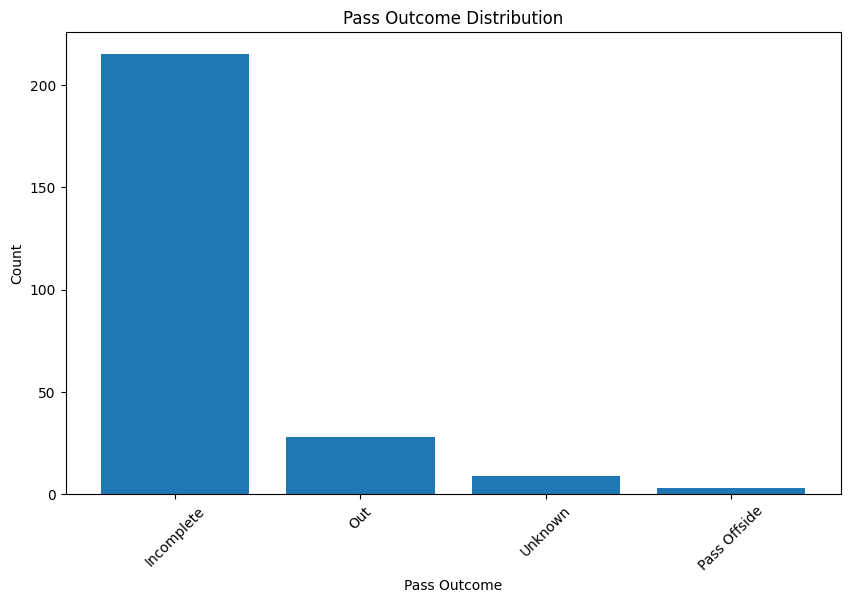

In [15]:
# Analyzing pass outcomes
print("\nAnalyzing pass outcomes")
pass_outcome_counts = passes['pass_outcome'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(pass_outcome_counts.index, pass_outcome_counts.values)
plt.xlabel('Pass Outcome')
plt.ylabel('Count')
plt.title('Pass Outcome Distribution')
plt.xticks(rotation=45)
plt.show()

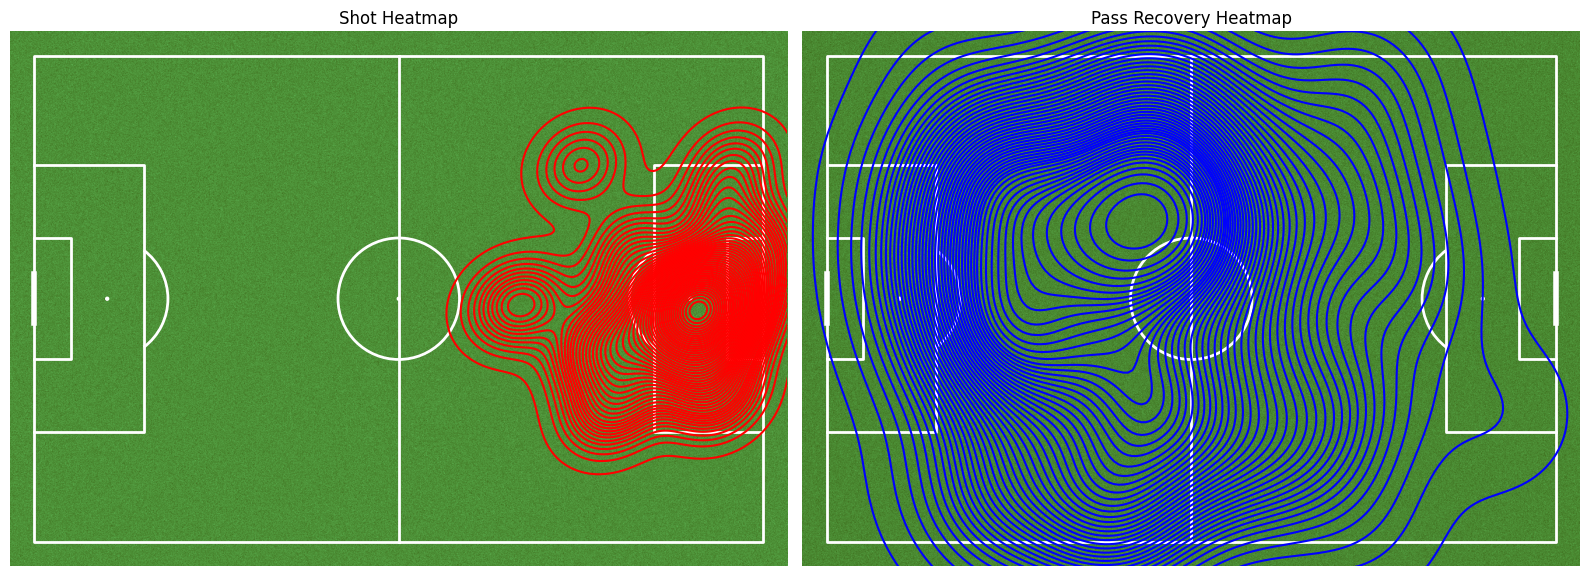

In [16]:
# Create an instance of the pitch
pitch = Pitch(pitch_type='statsbomb',
              pitch_color='grass', line_color='white')

# Plotting heatmaps for shots and passes
fig, axs = pitch.draw(nrows=1, ncols=2, figsize=(16, 7))

shot_locations = shots["location"].tolist()
recovery_passes = passes[passes["pass_type"] == "Recovery"]["location"].tolist()
x,y = zip(*shot_locations)
i,j = zip(*recovery_passes)


# Shots heatmap
sns.kdeplot(x=x, y=y, shade=False, levels=50, color='red', thresh=0.01, ax=axs[0])
axs[0].set_title('Shot Heatmap')

# Passes heatmap
sns.kdeplot(x=i, y=j, shade=False, levels=50, color='blue', thresh=0.01, ax=axs[1])
axs[1].set_title('Pass Recovery Heatmap')

plt.show()


## Correlation

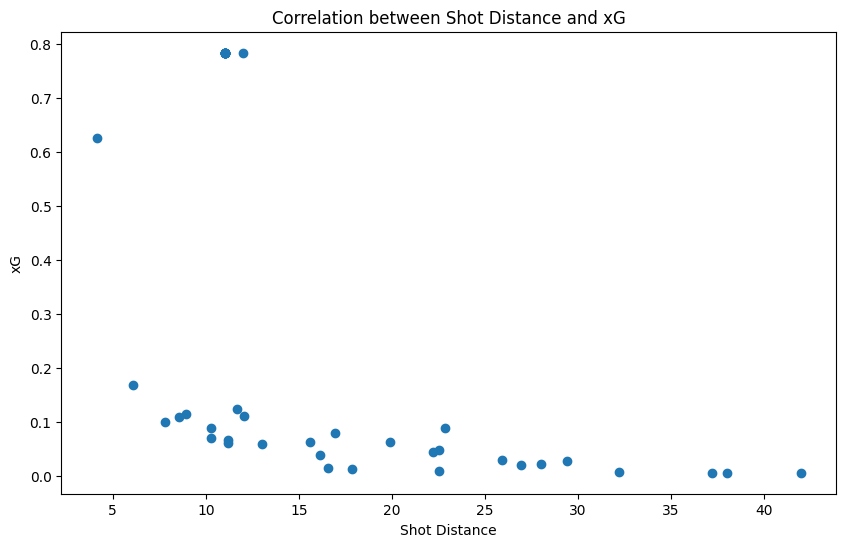

Correlation between Shot Distance and xG: -0.51


In [17]:
# Investigate the correlation between shot distance and xG
plt.figure(figsize=(10, 6))
plt.scatter(shots['distance'], shots['shot_statsbomb_xg'])
plt.xlabel('Shot Distance')
plt.ylabel('xG')
plt.title('Correlation between Shot Distance and xG')
plt.show()

corr_distance_xg = shots['distance'].corr(shots['shot_statsbomb_xg'])
print(f"Correlation between Shot Distance and xG: {corr_distance_xg:.2f}")

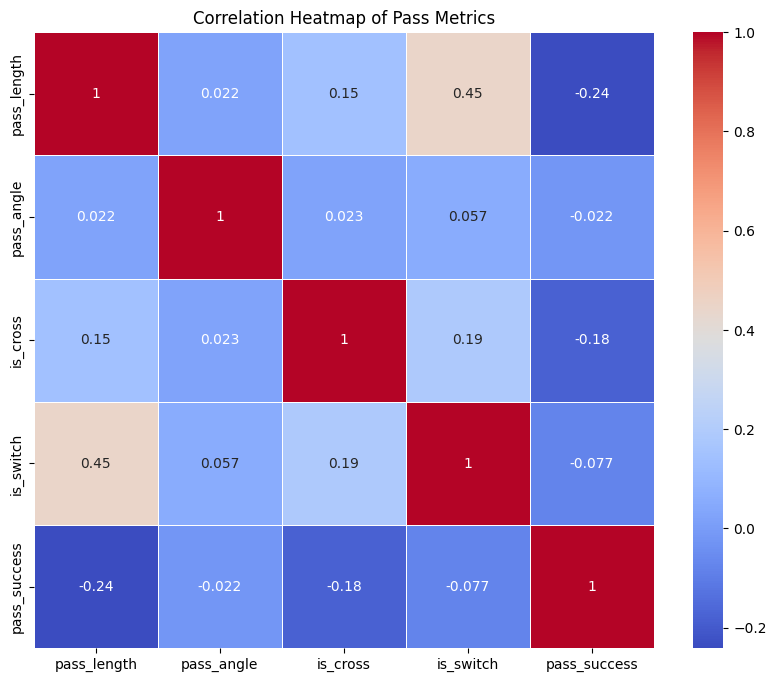

In [18]:
# Create binary indicators for specific pass types and success
passes['is_cross'] = passes['pass_cross'].notnull().astype(int)
passes['is_switch'] = passes['pass_switch'].notnull().astype(int)
passes['pass_success'] = pd.isna(passes['pass_outcome']).astype(int)

# Prepare a DataFrame for correlation analysis including the relevant columns
correlation_df = passes[['pass_length', 'pass_angle', 'is_cross', 'is_switch', 'pass_success']]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Pass Metrics')
plt.show()


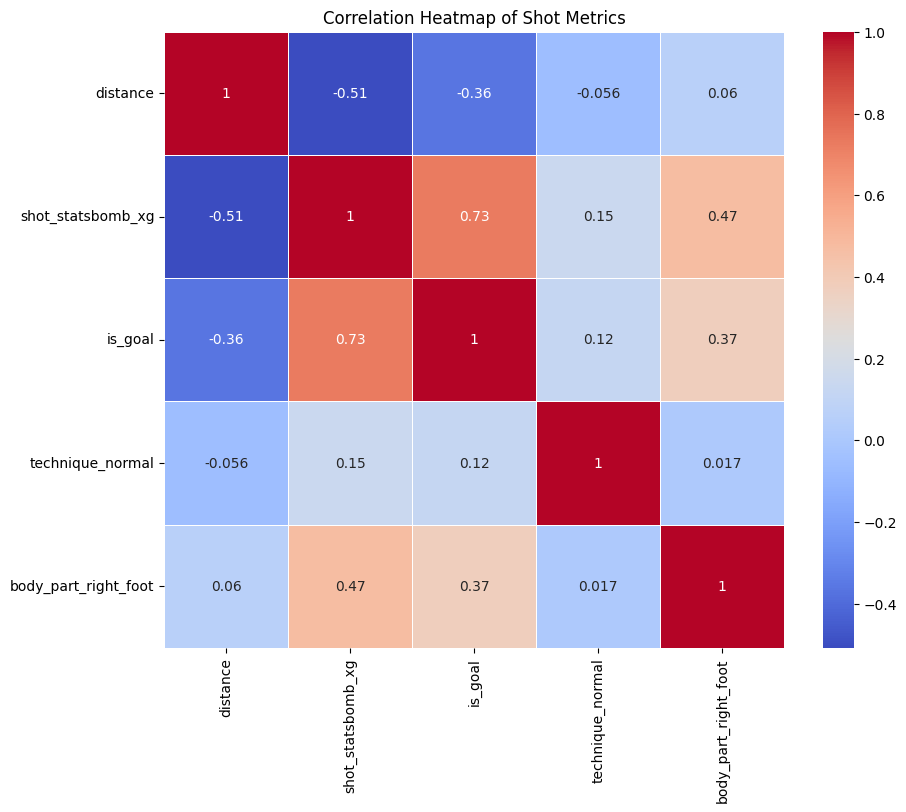

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'shot_outcome' into a binary indicator (1 for Goal, 0 for others)
shots['is_goal'] = (shots['shot_outcome'] == 'Goal').astype(int)

# Convert 'shot_technique' and 'shot_body_part' into binary indicators for simplicity
shots['technique_normal'] = (shots['shot_technique'] == 'Normal').astype(int)
shots['body_part_right_foot'] = (shots['shot_body_part'] == 'Right Foot').astype(int)

# Select columns to include in the correlation analysis
columns_to_include = ['distance', 'shot_statsbomb_xg', 'is_goal', 'technique_normal', 'body_part_right_foot']

# Drop any rows with NaN values in these columns to ensure clean correlation analysis
clean_shots = shots[columns_to_include].dropna()


# Calculate the correlation matrix
correlation_matrix = clean_shots.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Shot Metrics')
plt.show()



Analyzing player performance
Player performance:


,player,total_shots,total_goals,goal_conversion_rate
1,Harry Kane,4,2,0.500000
6,Radamel Falcao García Zárate,4,1,0.250000
2,Juan Guillermo Cuadrado Bello,3,1,0.333333
0,Eric Dier,2,1,0.500000
3,Kieran Trippier,2,1,0.500000
4,Luis Fernando Muriel Fruto,1,1,1.000000
5,Marcus Rashford,1,1,1.000000
7,Yerry Fernando Mina González,1,1,1.000000


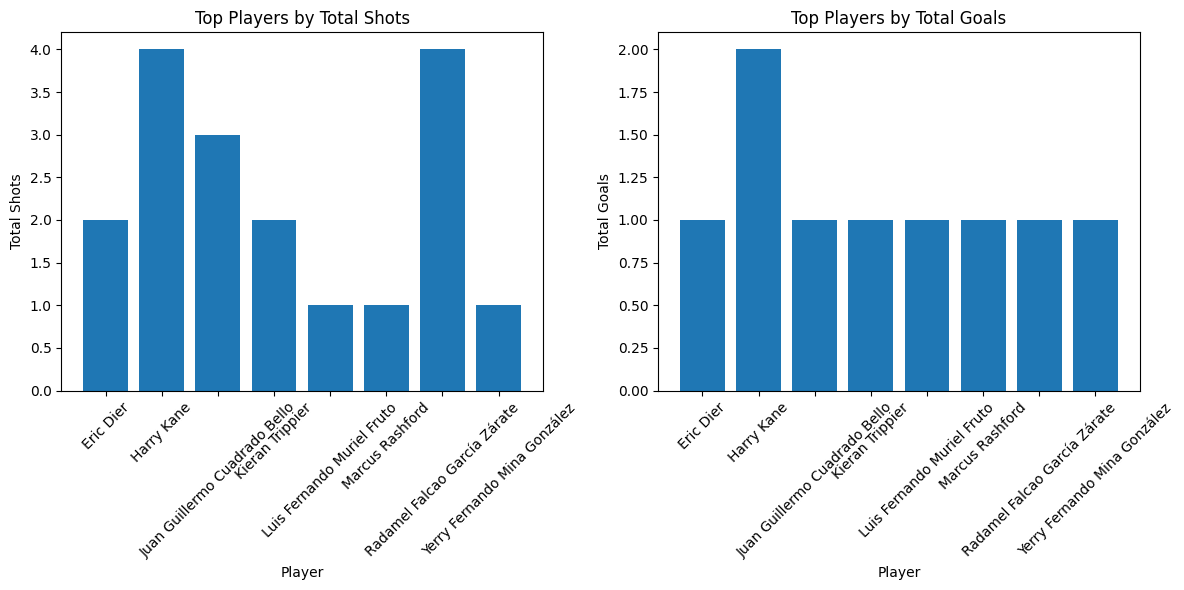

In [20]:
# Analyzing player performance
print("\nAnalyzing player performance")
player_shots = shots.groupby('player').size().reset_index(name='total_shots')
player_goals = shots[shots['shot_outcome'] == 'Goal'].groupby('player').size().reset_index(name='total_goals')
player_performance = pd.merge(player_shots, player_goals, on='player')
player_performance['goal_conversion_rate'] = player_performance['total_goals'] / player_performance['total_shots']

print("Player performance:")
display(player_performance.sort_values('total_shots', ascending=False).head(10))

# Plotting top players by shots and goals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(player_performance['player'], player_performance['total_shots'])
plt.xlabel('Player')
plt.ylabel('Total Shots')
plt.title('Top Players by Total Shots')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(player_performance['player'], player_performance['total_goals'])
plt.xlabel('Player')
plt.ylabel('Total Goals')
plt.title('Top Players by Total Goals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Radar Plots

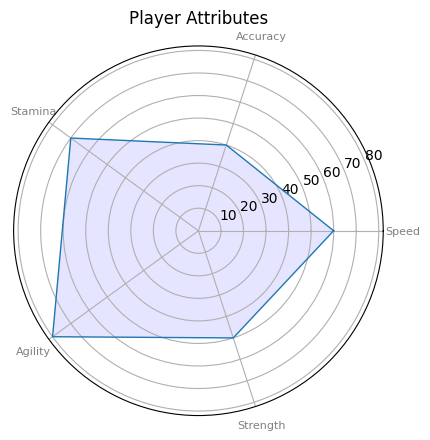

In [21]:

def plot_radar_chart(data, attributes, title="Player Attributes"):
    N = len(attributes)
    values = data
    values += values[:1]  # repeat the first value to close the circle
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], attributes, color='grey', size=8)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Attributes")
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.title(title)
    plt.show()


player_attributes = [60, 40, 70, 80, 50]  # example metrics like speed, accuracy, stamina, etc.
attributes = ['Speed', 'Accuracy', 'Stamina', 'Agility', 'Strength']
plot_radar_chart(player_attributes, attributes)


In [22]:
# Filter events for Harry Maguire
player_events = events[events['player'] == 'Harry Maguire']

# Calculate Pass Accuracy
total_passes = player_events[player_events['type'] == 'Pass']
completed_passes = total_passes[total_passes['pass_outcome'].isna()]
pass_accuracy = len(completed_passes) / len(total_passes) if len(total_passes) > 0 else 0

# Shots
shots_taken = player_events[player_events['type'] == 'Shot']
shots_on_target = shots_taken[shots_taken['shot_outcome'].isin(['Goal', 'Saved', 'Off T'])]
shot_accuracy = len(shots_on_target) / len(shots_taken) if len(shots_taken) > 0 else 0

# Print results
print(f"Pass Accuracy: {pass_accuracy*100:.2f}%")
print(f"Shots Taken: {len(shots_taken)}")
print(f"Shot Accuracy: {shot_accuracy*100:.2f}%")


Pass Accuracy: 83.75%
Shots Taken: 3
Shot Accuracy: 66.67%


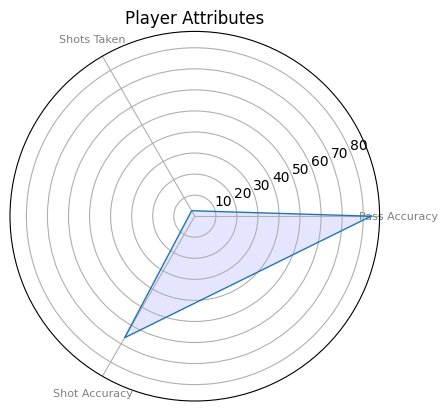

In [23]:
# Define attributes and data for radar chart
attributes = ['Pass Accuracy', 'Shots Taken', 'Shot Accuracy']
data = [pass_accuracy*100, len(shots_taken), shot_accuracy*100]

# Plot the radar chart
plot_radar_chart(data, attributes)


## xG Flow charts

In [24]:
events = sb.events (match_id = 18236)
df = events[events.type == 'Shot']
df = df[['period', 'minute', 'shot_statsbomb_xg', 'team', 'player', 'shot_outcome' ]]
df.rename(columns = {'shot_statsbomb_xg':'xG', 'shot_outcome':'result'}, inplace = True)
df.sort_values(by='team', inplace=True)
df.head(10)

,period,minute,xG,team,player,result
4183,2,46,0.026587,Barcelona,Andrés Iniesta Luján,Blocked
4192,2,68,0.081895,Barcelona,David Villa Sánchez,Goal
4191,2,66,0.024149,Barcelona,Andrés Iniesta Luján,Saved
4190,2,65,0.034109,Barcelona,Xavier Hernández Creus,Saved
4189,2,64,0.345341,Barcelona,Lionel Andrés Messi Cuccittini,Blocked
4188,2,62,0.154850,Barcelona,Lionel Andrés Messi Cuccittini,Saved
4187,2,53,0.040445,Barcelona,Lionel Andrés Messi Cuccittini,Goal
4186,2,51,0.056872,Barcelona,Lionel Andrés Messi Cuccittini,Blocked
4185,2,51,0.072877,Barcelona,Daniel Alves da Silva,Saved
4184,2,46,0.050354,Barcelona,Xavier Hernández Creus,Blocked


In [25]:
home_team = df["team"].iloc[0]
away_team = df["team"].iloc[-1]
print('Home Team : ' + home_team)
print('Away Team : ' + away_team)

Home Team : Barcelona
Away Team : Manchester United


In [26]:
df_home = df.loc[df["team"] == home_team].sort_values(by="minute")
df_away = df.loc[df["team"] == away_team].sort_values(by="minute")
df_home["h_cum"] = df_home["xG"].cumsum()
df_away["h_cum"] = df_away["xG"].cumsum()

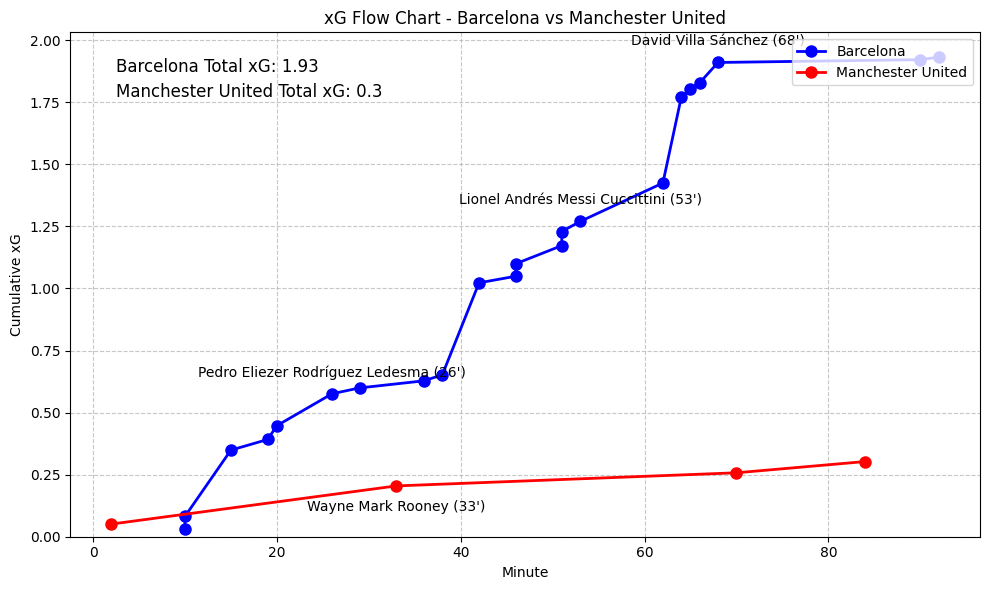

In [27]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the xG flow for each team
ax.plot(df_home['minute'], df_home['h_cum'], marker='o', linestyle='-', linewidth=2, markersize=8, label=home_team, color='blue')
ax.plot(df_away['minute'], df_away['h_cum'], marker='o', linestyle='-', linewidth=2, markersize=8, label=away_team, color='red')

# Set the x-axis and y-axis labels and title
ax.set_xlabel('Minute')
ax.set_ylabel('Cumulative xG')
ax.set_title(f'xG Flow Chart - {home_team} vs {away_team}')

# Set the y-axis range
ax.set_ylim(0, max(df_home['h_cum'].max(), df_away['h_cum'].max()) + 0.1)

# Add a grid
ax.grid(True, linestyle='--', alpha=0.7)

# Add goal annotations
for idx, row in df_home[df_home['result'] == 'Goal'].iterrows():
    ax.annotate(f"{row['player']} ({row['minute']}')", xy=(row['minute'], row['h_cum']), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom')

for idx, row in df_away[df_away['result'] == 'Goal'].iterrows():
    ax.annotate(f"{row['player']} ({row['minute']}')", xy=(row['minute'], row['h_cum']), xytext=(0, -10), textcoords='offset points', ha='center', va='top')

# Add a legend in the upper right corner
ax.legend(loc='upper right')

# Display the total xG for each team in the upper left corner
home_total_xg = round(df_home['xG'].sum(), 2)
away_total_xg = round(df_away['xG'].sum(), 2)
ax.text(0.05, 0.95, f"{home_team} Total xG: {home_total_xg}", transform=ax.transAxes, fontsize=12, verticalalignment='top')
ax.text(0.05, 0.90, f"{away_team} Total xG: {away_total_xg}", transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Adjust the plot layout and display
plt.tight_layout()
plt.show()

# Homework Assignment: xG Flow Chart Function

Instructions:

1. Take the code provided for creating the xG Flow Chart and convert it into a reusable function called `plot_xg_flow_chart`.
   The function should accept the following parameters:
   - `df_home`: DataFrame containing the home team's shot data
   - `df_away`: DataFrame containing the away team's shot data
   - `home_team`: Name of the home team (string)
   - `away_team`: Name of the away team (string)

2. The function should create and display the xG Flow Chart based on the provided data and team names.

3. Test your function by applying it to different matches. You can use the `events` function from the StatsBomb library
   to retrieve shot data for various matches and pass the relevant data to your `plot_xg_flow_chart` function.

4. Experiment with different customization options to further enhance the appearance and readability of the chart.
   Consider adding team logos, adjusting colors based on team preferences, or highlighting specific events or periods of interest.

5. Document your function by adding a docstring that explains its purpose, parameters, and any additional information
   that would be helpful for users.


Note: Make sure to handle any necessary data preprocessing steps within your function to ensure it works smoothly with the
provided data. Also, function parameters were a suggestion - feel free to improvize!

Happy coding, and let me know if you have any questions!
# Your code here